# Modern Robotics 3.2 — Rotation Matrices (From 2D Basis → 3D Rx/Ry/Rz → General R)

This notebook builds the rotation-matrix idea in the most *first-principles* way:

1. **2D rotation from basis vectors** (why the `cos` / `sin` pattern appears)
2. **Why “basis → all vectors”** (linearity)
3. Lift to **3D axis rotations**: \(R_x(\theta), R_y(\theta), R_z(\theta)\)
4. Build a **general 3D rotation** by composing axis rotations
5. Visual checks: \(R^T R = I\) and \(\det(R)=1\)

> Goal: make the formulas feel inevitable, not memorized.


## Preview (side-by-side)

<div style="display:flex; gap:16px; align-items:flex-start; flex-wrap:wrap;">

  <div style="flex:1; min-width:240px;">
    <b>Yaw / Pitch / Roll</b><br>
    <img src="../assets/Yaw_Axis_Corrected.png" width="320">
  </div>

  <div style="flex:1; min-width:240px;">
    <b>2D rotation from basis</b><br>
    <img src="../assets/rot2d_basis.png" width="320">
  </div>

  <div style="flex:1; min-width:240px;">
    <b>Composition (Rx → Ry → Rz)</b><br>
    <img src="../assets/rotation_composition_video.gif" width="320">
  </div>

</div>


In [1]:
import numpy as np
import matplotlib.pyplot as plt


## 1) 2D: A rotation is determined by what it does to the basis

Let the 2D standard basis be:

\[
e_1=\begin{bmatrix}1\\0\end{bmatrix},\qquad
e_2=\begin{bmatrix}0\\1\end{bmatrix}.
\]

A linear transform \(A\) is completely determined by \(A e_1\) and \(A e_2\).
Reason: any vector \(v=\begin{bmatrix}x\\y\end{bmatrix}\) can be written as
\[
v = x e_1 + y e_2.
\]

If \(A\) is linear, then
\[
A v = A(x e_1 + y e_2)=x\,A e_1 + y\,A e_2.
\]

So if we know where the basis vectors go, we know what happens to **every** vector.

We'll now apply this to rotations.


NameError: name 'c_e1' is not defined

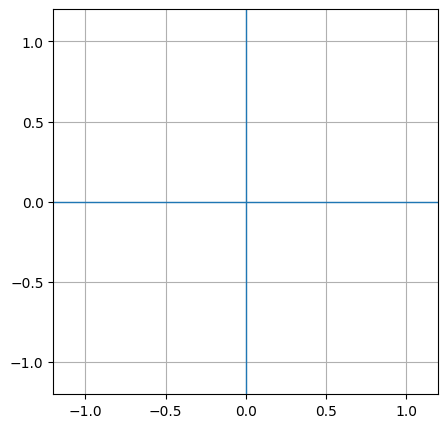

In [2]:
# A tiny helper to plot 2D arrows
def plot_2d_axes(ax, lim=1.2):
    ax.axhline(0, linewidth=1)
    ax.axvline(0, linewidth=1)
    ax.set_aspect("equal", "box")
    ax.set_xlim(-lim, lim)
    ax.set_ylim(-lim, lim)
    ax.grid(True)

# def arrow(ax, v, text=None):
#     ax.arrow(0, 0, v[0], v[1], head_width=0.05, length_includes_head=True)
#     if text:
#         ax.text(v[0]*1.05, v[1]*1.05, text)

def arrow(ax, v, text=None, color=None, lw=2):
    ax.arrow(
        0, 0, v[0], v[1],
        head_width=0.05,
        length_includes_head=True,
        linewidth=lw,
        color=color
    )
    if text:
        ax.text(v[0]*1.05, v[1]*1.05, text, color=color)



# Standard basis
e1 = np.array([1.0, 0.0])
e2 = np.array([0.0, 1.0])

fig, ax = plt.subplots(figsize=(5,5))
plot_2d_axes(ax)
arrow(ax, e1, "e1", color=c_e1)
arrow(ax, e2, "e2", color=c_e2)
ax.set_title("2D standard basis vectors")
plt.show()


## 2) 2D: Derive the cosine/sine pattern from rotating the basis

A **rotation by angle \(\theta\)** (counterclockwise) maps the x-axis unit vector \(e_1\) to a unit vector
that makes an angle \(\theta\) with the x-axis:

\[
R(\theta)e_1=\begin{bmatrix}\cos\theta\\\sin\theta\end{bmatrix}.
\]

Now: what is \(R(\theta)e_2\)?

- A proper rotation preserves orthogonality and lengths.
- Since \(e_2\) is 90° counterclockwise from \(e_1\), the rotated \(e_2\) must be 90° counterclockwise from \(R(\theta)e_1\).

A 90° CCW rotation in 2D takes \((a,b)\mapsto(-b,a)\).  
So if \(R(\theta)e_1=(\cos\theta,\sin\theta)\), then

\[
R(\theta)e_2 = \begin{bmatrix}-\sin\theta\\\cos\theta\end{bmatrix}.
\]

These two vectors are the **columns** of the matrix \(R(\theta)\) (because columns are images of basis vectors):

\[
R(\theta)=\begin{bmatrix}
\cos\theta & -\sin\theta\\
\sin\theta & \cos\theta
\end{bmatrix}.
\]

That’s where the `c, -s; s, c` pattern comes from.


theta=35 deg
R(θ)=
 [[ 0.81915204 -0.57357644]
 [ 0.57357644  0.81915204]]

R e1 = [0.81915204 0.57357644]   (should be [cosθ, sinθ])
R e2 = [-0.57357644  0.81915204]   (should be [-sinθ, cosθ])


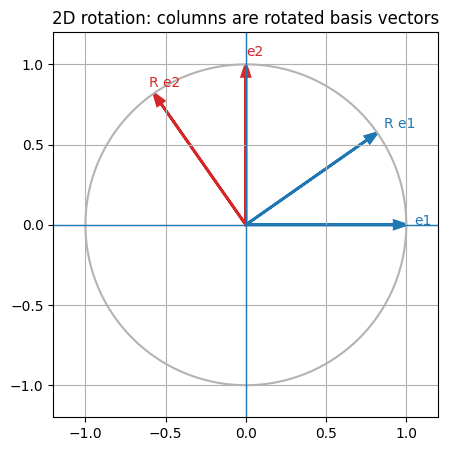

In [ ]:
def R2(theta):
    c, s = np.cos(theta), np.sin(theta)
    return np.array([[c, -s],
                     [s,  c]], dtype=float)

theta_deg = 35
theta = np.deg2rad(theta_deg)
R = R2(theta)

# Show basis mapping
Re1 = R @ e1
Re2 = R @ e2

print(f"theta={theta_deg} deg")
print("R(θ)=\n", R)
print("\nR e1 =", Re1, "  (should be [cosθ, sinθ])")
print("R e2 =", Re2, "  (should be [-sinθ, cosθ])")

# Visualize on unit circle
t = np.linspace(0, 2*np.pi, 400)


# fig, ax = plt.subplots(figsize=(5,5))
# ax.plot(np.cos(t), np.sin(t))
# plot_2d_axes(ax)
# arrow(ax, e1, "e1")
# arrow(ax, e2, "e2")
# arrow(ax, Re1, "R e1")
# arrow(ax, Re2, "R e2")
# ax.set_title("2D rotation: columns are rotated basis vectors")
# plt.show()



# Choose colors (feel free to change)
c_e1, c_e2 = "tab:blue", "tab:red"
c_Re1, c_Re2 = "tab:blue", "tab:red"

fig, ax = plt.subplots(figsize=(5,5))
ax.plot(np.cos(t), np.sin(t), color="0.7")  # light gray circle
plot_2d_axes(ax)

arrow(ax, e1,  "e1",   color=c_e1)
arrow(ax, e2,  "e2",   color=c_e2)
arrow(ax, Re1, "R e1", color=c_Re1)
arrow(ax, Re2, "R e2", color=c_Re2)

ax.set_title("2D rotation: columns are rotated basis vectors")
# plt.show()

from pathlib import Path

ASSETS = Path("assets")
ASSETS.mkdir(exist_ok=True)

fig.savefig(ASSETS / "rot2d_basis.png", dpi=200, bbox_inches="tight")
plt.show()


## 3) “If it works for the basis, it works for *every* vector” (linearity demo)

Take any vector \(v=[x,y]^T\). Because \(v=x e_1 + y e_2\),

\[
R v = x\,R e_1 + y\,R e_2.
\]

This means:
- The whole plane rotates correctly, not just the axes.
- You don't need to derive a separate formula for every point: the basis mapping already *forces* it.

Let's confirm numerically and visually.


v = [0.6 0.9]
R v (direct)     = [-0.02472757  1.0813827 ]
R v (via basis)  = [-0.02472757  1.0813827 ]
match? True


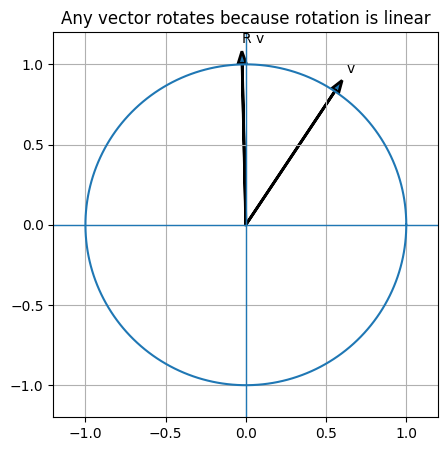

In [ ]:
v = np.array([0.6, 0.9])  # any point
Rv_direct = R @ v

# Basis decomposition
x, y = v
Rv_via_basis = x * (R @ e1) + y * (R @ e2)

print("v =", v)
print("R v (direct)     =", Rv_direct)
print("R v (via basis)  =", Rv_via_basis)
print("match?", np.allclose(Rv_direct, Rv_via_basis))

fig, ax = plt.subplots(figsize=(5,5))
ax.plot(np.cos(t), np.sin(t))
plot_2d_axes(ax)
arrow(ax, v, "v")
arrow(ax, Rv_direct, "R v")
ax.set_title("Any vector rotates because rotation is linear")
plt.show()


## 4) Lift to 3D: rotations about x, y, z axes

In 3D, rotating about the x-axis means:

- The x-coordinate stays the same
- The (y, z) coordinates rotate like a 2D rotation

So \(R_x(\theta)\) contains the same 2D `cos/sin` block inside the y–z rows/cols:

\[
R_x(\theta)=
\begin{bmatrix}
1 & 0 & 0\\
0 & \cos\theta & -\sin\theta\\
0 & \sin\theta & \cos\theta
\end{bmatrix}.
\]

Similarly:

\[
R_y(\theta)=
\begin{bmatrix}
\cos\theta & 0 & \sin\theta\\
0 & 1 & 0\\
-\sin\theta & 0 & \cos\theta
\end{bmatrix},\qquad
R_z(\theta)=
\begin{bmatrix}
\cos\theta & -\sin\theta & 0\\
\sin\theta & \cos\theta & 0\\
0 & 0 & 1
\end{bmatrix}.
\]

Again: these come from “2D rotation in the plane perpendicular to the axis.”


In [ ]:
def Rx(theta: float) -> np.ndarray:
    c, s = np.cos(theta), np.sin(theta)
    return np.array([[1, 0, 0],
                     [0, c,-s],
                     [0, s, c]], dtype=float)

def Ry(theta: float) -> np.ndarray:
    c, s = np.cos(theta), np.sin(theta)
    return np.array([[ c, 0, s],
                     [ 0, 1, 0],
                     [-s, 0, c]], dtype=float)

def Rz(theta: float) -> np.ndarray:
    c, s = np.cos(theta), np.sin(theta)
    return np.array([[c,-s, 0],
                     [s, c, 0],
                     [0, 0, 1]], dtype=float)

def is_so3(R: np.ndarray, atol: float = 1e-7) -> dict:
    RtR = R.T @ R
    det = float(np.linalg.det(R))
    return {
        "RtR_close_to_I": bool(np.allclose(RtR, np.eye(3), atol=atol)),
        "det_close_to_1": bool(np.isclose(det, 1.0, atol=atol)),
        "det": det,
    }

theta_deg = 90
theta = np.deg2rad(theta_deg)

print("Rx(90°)=\n", Rx(theta))
print("Ry(90°)=\n", Ry(theta))
print("Rz(90°)=\n", Rz(theta))
print("\nSO(3) check Rx:", is_so3(Rx(theta)))
print("SO(3) check Ry:", is_so3(Ry(theta)))
print("SO(3) check Rz:", is_so3(Rz(theta)))

# Basis vectors
ex = np.array([1.,0.,0.])
ey = np.array([0.,1.,0.])
ez = np.array([0.,0.,1.])

# Example: rotate ey about x by +90° -> should become +ez
print("\nRx(90°) * ey =", Rx(theta) @ ey, " (expect [0,0,1])")
# Example: rotate ez about x by +90° -> should become -ey
print("Rx(90°) * ez =", Rx(theta) @ ez, " (expect [0,-1,0])")


Rx(90°)=
 [[ 1.000000e+00  0.000000e+00  0.000000e+00]
 [ 0.000000e+00  6.123234e-17 -1.000000e+00]
 [ 0.000000e+00  1.000000e+00  6.123234e-17]]
Ry(90°)=
 [[ 6.123234e-17  0.000000e+00  1.000000e+00]
 [ 0.000000e+00  1.000000e+00  0.000000e+00]
 [-1.000000e+00  0.000000e+00  6.123234e-17]]
Rz(90°)=
 [[ 6.123234e-17 -1.000000e+00  0.000000e+00]
 [ 1.000000e+00  6.123234e-17  0.000000e+00]
 [ 0.000000e+00  0.000000e+00  1.000000e+00]]

SO(3) check Rx: {'RtR_close_to_I': True, 'det_close_to_1': True, 'det': 1.0}
SO(3) check Ry: {'RtR_close_to_I': True, 'det_close_to_1': True, 'det': 1.0}
SO(3) check Rz: {'RtR_close_to_I': True, 'det_close_to_1': True, 'det': 1.0}

Rx(90°) * ey = [0.000000e+00 6.123234e-17 1.000000e+00]  (expect [0,0,1])
Rx(90°) * ez = [ 0.000000e+00 -1.000000e+00  6.123234e-17]  (expect [0,-1,0])


## 5) General 3D rotation by composition (matrix multiplication)

Any 3D rotation can be represented (not uniquely) as a product of simple axis rotations.

One common parameterization is “yaw–pitch–roll”:

$$
R = R_z(\mathrm{yaw}) \, R_y(\mathrm{pitch}) \, R_x(\mathrm{roll})
$$

**Important:** order matters. In general,

$$
R_z R_y R_x \neq R_x R_y R_z
$$


**Important:** order matters. Generally,
\[
R_z R_y R_x \neq R_x R_y R_z.
\]

We'll build one, check it's in SO(3), and use it to rotate a vector.


In [ ]:
yaw_deg, pitch_deg, roll_deg = 40, -20, -0
yaw, pitch, roll = np.deg2rad([yaw_deg, pitch_deg, roll_deg])

R_sb = Rz(yaw) @ Ry(pitch) @ Rx(roll)
print("R_sb=\n", R_sb)
print("SO(3) check:", is_so3(R_sb))

# Rotate a vector
v = np.array([0.3, 0.8, 0.1])
v_rot = R_sb @ v
print("\nv =", v)
print("R_sb v =", v_rot)

print("\nLength preserved?")
print("||v|| =", np.linalg.norm(v))
print("||R v|| =", np.linalg.norm(v_rot))


R_sb=
 [[ 0.71984631 -0.64278761 -0.26200263]
 [ 0.60402277  0.76604444 -0.21984631]
 [ 0.34202014  0.          0.93969262]]
SO(3) check: {'RtR_close_to_I': True, 'det_close_to_1': True, 'det': 0.9999999999999998}

v = [0.3 0.8 0.1]
R_sb v = [-0.32447646  0.77205776  0.19657531]

Length preserved?
||v|| = 0.8602325267042628
||R v|| = 0.8602325267042626


## 6) 3D visualization of frames (space vs body)

The **columns** of \(R_{sb}\) are the **body axes expressed in space coordinates**.

We draw `{s}` as the identity frame and `{b}` as rotated by \(R_{sb}\).


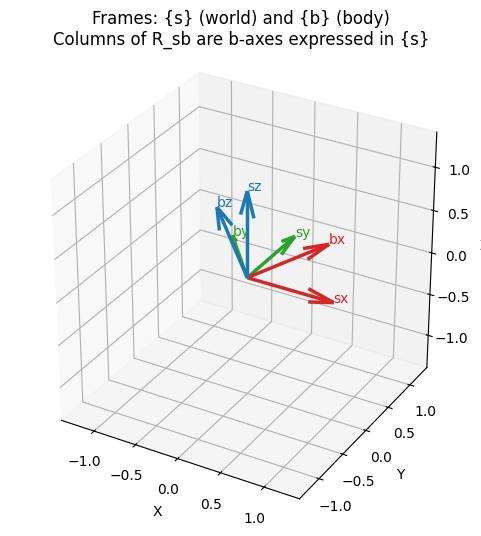

In [ ]:
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401

# def draw_frame(ax, R=np.eye(3), p=np.zeros(3), label="", axis_len=1.0, lw=2.5):
#     x_axis = R[:, 0] * axis_len
#     y_axis = R[:, 1] * axis_len
#     z_axis = R[:, 2] * axis_len

#     ax.quiver(p[0], p[1], p[2], x_axis[0], x_axis[1], x_axis[2], linewidth=lw)
#     ax.text(p[0] + x_axis[0], p[1] + x_axis[1], p[2] + x_axis[2], f"{label}x")

#     ax.quiver(p[0], p[1], p[2], y_axis[0], y_axis[1], y_axis[2], linewidth=lw)
#     ax.text(p[0] + y_axis[0], p[1] + y_axis[1], p[2] + y_axis[2], f"{label}y")

#     ax.quiver(p[0], p[1], p[2], z_axis[0], z_axis[1], z_axis[2], linewidth=lw)
#     ax.text(p[0] + z_axis[0], p[1] + z_axis[1], p[2] + z_axis[2], f"{label}z")


def draw_frame(ax, R=np.eye(3), p=np.zeros(3), label="", axis_len=1.0, lw=2.5,
               colors=("tab:red", "tab:green", "tab:blue")):
    """
    colors = (x_color, y_color, z_color)
    Columns of R are the x/y/z axes directions in world coords.
    """
    x_axis = R[:, 0] * axis_len
    y_axis = R[:, 1] * axis_len
    z_axis = R[:, 2] * axis_len

    ax.quiver(p[0], p[1], p[2], x_axis[0], x_axis[1], x_axis[2], linewidth=lw, color=colors[0])
    ax.text(p[0] + x_axis[0], p[1] + x_axis[1], p[2] + x_axis[2], f"{label}x", color=colors[0])

    ax.quiver(p[0], p[1], p[2], y_axis[0], y_axis[1], y_axis[2], linewidth=lw, color=colors[1])
    ax.text(p[0] + y_axis[0], p[1] + y_axis[1], p[2] + y_axis[2], f"{label}y", color=colors[1])

    ax.quiver(p[0], p[1], p[2], z_axis[0], z_axis[1], z_axis[2], linewidth=lw, color=colors[2])
    ax.text(p[0] + z_axis[0], p[1] + z_axis[1], p[2] + z_axis[2], f"{label}z", color=colors[2])


def set_axes_equal_3d(ax, lim=1.4):
    ax.set_xlim(-lim, lim)
    ax.set_ylim(-lim, lim)
    ax.set_zlim(-lim, lim)
    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    ax.set_zlabel("Z")
    ax.set_box_aspect([1,1,1])

# fig = plt.figure(figsize=(7,6))
# ax = fig.add_subplot(111, projection="3d")

# draw_frame(ax, np.eye(3), label="s", axis_len=1.0)
# draw_frame(ax, R_sb, label="b", axis_len=0.9)

# ax.set_title("Frames: {s} (world) and {b} (body)\\nColumns of R_sb are b-axes expressed in {s}")
# set_axes_equal_3d(ax, lim=1.4)
# plt.show()

fig = plt.figure(figsize=(7,6))
ax = fig.add_subplot(111, projection="3d")

# Space frame {s}: make it gray-ish
draw_frame(ax, np.eye(3), label="s", axis_len=1.0,
           colors=("tab:red", "tab:green", "tab:blue"))

# Body frame {b}: RGB axes (x red, y green, z blue)
draw_frame(ax, R_sb, label="b", axis_len=0.9,
           colors=("tab:red", "tab:green", "tab:blue"))

# Also: your title currently shows "\n" literally because it's escaped.
ax.set_title("Frames: {s} (world) and {b} (body)\nColumns of R_sb are b-axes expressed in {s}")

set_axes_equal_3d(ax, lim=1.4)
plt.show()



In [ ]:
import numpy as np
import plotly.graph_objects as go

def frame_traces(R, name_prefix="", axis_len=1.0, colors=("red","green","blue")):
    # columns are axes
    cols = [R[:,0], R[:,1], R[:,2]]
    labels = ["x","y","z"]
    traces = []
    for v, lab, col in zip(cols, labels, colors):
        traces.append(go.Scatter3d(
            x=[0, axis_len*v[0]],
            y=[0, axis_len*v[1]],
            z=[0, axis_len*v[2]],
            mode="lines+text",
            text=["", f"{name_prefix}{lab}"],
            textposition="top center",
            line=dict(width=8, color=col),
            name=f"{name_prefix}{lab}"
        ))
    return traces

fig = go.Figure()

# space frame (make it gray)
fig.add_traces(frame_traces(np.eye(3), name_prefix="s", axis_len=1.0, colors=("gray","gray","gray")))
# body frame (RGB)
fig.add_traces(frame_traces(R_sb, name_prefix="b", axis_len=0.9, colors=("red","green","blue")))

fig.update_layout(
    title="Interactive frames: {s} (world) and {b} (body)",
    scene=dict(
        xaxis_title="X", yaxis_title="Y", zaxis_title="Z",
        aspectmode="cube"
    ),
    showlegend=False
)

fig.show()


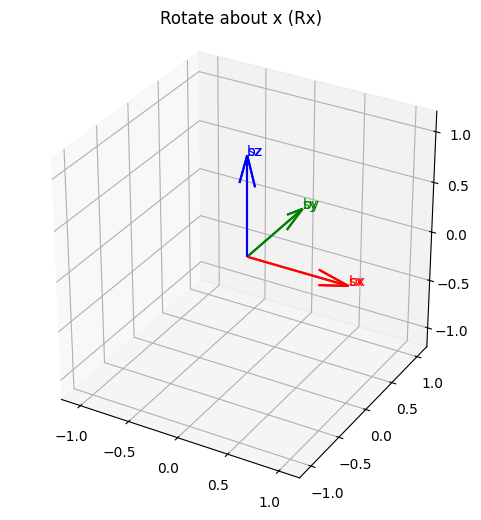

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

def Rx(t):
    c,s = np.cos(t), np.sin(t)
    return np.array([[1,0,0],[0,c,-s],[0,s,c]])

def Ry(t):
    c,s = np.cos(t), np.sin(t)
    return np.array([[c,0,s],[0,1,0],[-s,0,c]])

def Rz(t):
    c,s = np.cos(t), np.sin(t)
    return np.array([[c,-s,0],[s,c,0],[0,0,1]])

def draw_frame(ax, R, label="", axis_len=1.0):
    colors = ["r","g","b"]
    for i in range(3):
        v = R[:,i] * axis_len
        ax.quiver(0,0,0, v[0],v[1],v[2], color=colors[i])
        ax.text(v[0],v[1],v[2], f"{label}{'xyz'[i]}", color=colors[i])

# target angles
yaw, pitch, roll = np.deg2rad([40, 20, -10])

fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection="3d")

def update(frame):
    ax.cla()
    ax.set_xlim(-1.2,1.2)
    ax.set_ylim(-1.2,1.2)
    ax.set_zlim(-1.2,1.2)
    ax.set_box_aspect([1,1,1])

    # space frame
    draw_frame(ax, np.eye(3), label="s")

    # progressive composition
    if frame < 30:
        R = Rx(roll * frame/30)
        title = "Rotate about x (Rx)"
    elif frame < 60:
        R = Ry(pitch * (frame-30)/30) @ Rx(roll)
        title = "Then rotate about y (Ry @ Rx)"
    else:
        R = Rz(yaw * (frame-60)/30) @ Ry(pitch) @ Rx(roll)
        title = "Then rotate about z (Rz @ Ry @ Rx)"

    draw_frame(ax, R, label="b")
    ax.set_title(title)

ani = FuncAnimation(fig, update, frames=90, interval=80)


In [ ]:
ani.save("rotation_composition.gif", writer="pillow", fps=12)
